In [5]:
import yaml
import pandas as pd
import numpy as np
import os

from src.data_preproc.preprocessing import DataPreprocessor

In [ ]:
config = yaml.safe_load(open('config.yaml'))

data_preproc = DataPreprocessor(data_path=config['data_path'], raw_data_path=config['raw_data_path'], cuts=False, splits=False, mass_matching=False)


X, y, types = data_preproc.run_preprocessing(return_numpy=False)
y

,p_v_1_E,p_v_1_x,p_v_1_y,p_v_1_z,p_v_2_E,p_v_2_x,p_v_2_y,p_v_2_z
0,24.155747,-9.751504,1.652740,-22.038074,32.633243,-5.192401,-31.834253,-4.954573
1,23.813755,6.082861,15.858921,16.690967,104.635343,-33.046353,-6.449344,99.070175
2,29.344590,-18.987219,14.320044,-17.190893,26.862526,13.568716,-23.093071,2.048255
3,1017.878899,-17.337016,11.145277,-1017.670214,166.030231,-14.434660,8.715525,-165.171783
4,33.715197,-8.949950,29.926252,-12.689853,33.197795,24.752230,21.648865,4.554922
...,...,...,...,...,...,...,...,...
437468,36.180151,2.918932,-16.748577,-31.936943,45.971416,39.393362,9.305436,-21.793188
437469,16.674753,12.046663,5.232006,10.273822,20.443327,10.176135,8.112032,-15.766129
437470,78.759600,38.007458,-13.590390,67.629942,49.366564,16.355877,10.789491,45.311475
437471,28.627128,-16.838359,-11.530906,20.075367,43.795926,-23.368973,31.438789,19.585115


In [7]:
# Delete config['data_path'] file (data/hww_simulated_final.csv) using os
os.remove(config['data_path'])

In [ ]:
data_preproc_mass_match = DataPreprocessor(data_path=config['data_path'], raw_data_path=config['raw_data_path'], cuts=False, splits=False, mass_matching=True)
X_mass, y_mass, types_mass = data_preproc_mass_match.run_preprocessing(return_numpy=False)
y_mass

,p_v_1_E,p_v_1_x,p_v_1_y,p_v_1_z,p_v_2_E,p_v_2_x,p_v_2_y,p_v_2_z
0,24.155747,-9.751504,1.652740,-22.038074,32.633243,-5.192401,-31.834253,-4.954573
1,104.635343,-33.046353,-6.449344,99.070175,23.813755,6.082861,15.858921,16.690967
2,26.862526,13.568716,-23.093071,2.048255,29.344590,-18.987219,14.320044,-17.190893
3,166.030231,-14.434660,8.715525,-165.171783,1017.878899,-17.337016,11.145277,-1017.670214
4,33.715197,-8.949950,29.926252,-12.689853,33.197795,24.752230,21.648865,4.554922
...,...,...,...,...,...,...,...,...
437468,45.971416,39.393362,9.305436,-21.793188,36.180151,2.918932,-16.748577,-31.936943
437469,16.674753,12.046663,5.232006,10.273822,20.443327,10.176135,8.112032,-15.766129
437470,78.759600,38.007458,-13.590390,67.629942,49.366564,16.355877,10.789491,45.311475
437471,43.795926,-23.368973,31.438789,19.585115,28.627128,-16.838359,-11.530906,20.075367


In [9]:
v1_y = y[['p_v_1_E', 'p_v_1_x', 'p_v_1_y', 'p_v_1_z']].values
v2_y = y[['p_v_2_E', 'p_v_2_x', 'p_v_2_y', 'p_v_2_z']].values

v1_y_mass = y_mass[['p_v_1_E', 'p_v_1_x', 'p_v_1_y', 'p_v_1_z']].values
v2_y_mass = y_mass[['p_v_2_E', 'p_v_2_x', 'p_v_2_y', 'p_v_2_z']].values
v1_y

array([[  24.155747  ,   -9.75150427,    1.6527403 ,  -22.03807449],
       [  23.8137553 ,    6.08286127,   15.85892106,   16.69096651],
       [  29.34459006,  -18.98721894,   14.32004437,  -17.19089328],
       ...,
       [  78.75960002,   38.00745829,  -13.59039048,   67.62994156],
       [  28.62712823,  -16.83835917,  -11.53090558,   20.07536669],
       [ 432.4759984 ,  -18.68602941,   18.43638899, -431.67860852]])

In [10]:
# Compute difference norm between vectors
def is_same(vec1, vec2, tol=1e-5):
    return np.linalg.norm(vec1 - vec2, axis=1) < tol

# Check if assignments match
same_1 = is_same(v1_y, v1_y_mass)
same_2 = is_same(v2_y, v2_y_mass)

# Check if switched
switched_1 = is_same(v1_y, v2_y_mass)
switched_2 = is_same(v2_y, v1_y_mass)

In [11]:
# Flag rows
switched_rows = (switched_1 & switched_2) & ~(same_1 & same_2)

# View switched indices
switched_indices = np.where(switched_rows)[0]
print(f"Number of switched rows: {len(switched_indices)}")
print("Switched row indices:", switched_indices)

Number of switched rows: 218941
Switched row indices: [     1      2      3 ... 437465 437468 437471]


<Axes: >

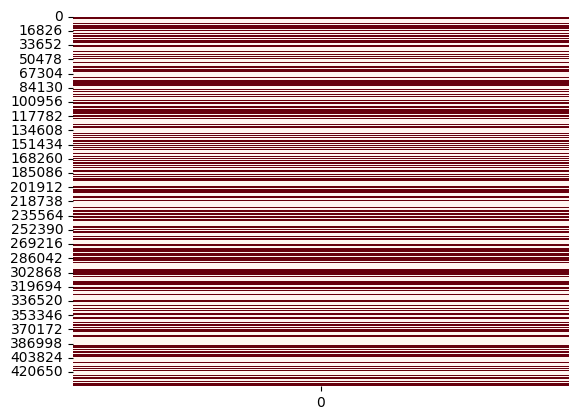

In [15]:
import seaborn as sns

sns.heatmap(switched_rows.reshape(-1, 1), cbar=False, cmap="Reds")